# Fetching data

**Table of contents**<a id='toc0_'></a>    
- 1. [Fetching data using an API](#toc1_)    
  - 1.1. [Import data from Denmark Statistics](#toc1_1_)    
  - 1.2. [FRED (Federal Reserve Economic Data)](#toc1_2_)    
  - 1.3. [World Bank indicators: `wb`](#toc1_3_)    
- 2. [A few examples of open access APIs](#toc2_)    
- 3. [Other sources](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You may need to install the DST api-data reader, the pandas_datareader and the matplotlib_venn module. Uncomment the following cells and run to install.  
The %pip is a jupyter magic function, it is similar to writing pip install directly in your terminal/comand prompt. (see [Link](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)).  
You could also use a ! in front of each command, which indicates that this is a system command that may as well have been executed in the terminal/command prompt of your computer. 

In [1]:
# The DST API wrapper
#%pip install git+https://github.com/elben10/pydst

In [2]:
# A wrapper for multiple APIs with a pandas interface
#%pip install pandas-datareader

In [3]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[Fetching data using an API](#toc0_)

API stands for **Application Programming Interface**. An API is an interface through which we can directly ask for and **receive data from an online source**. We will be using packages for this and will not look at what is going on underneath. 

1. We use `pandas_datareader` to access many common **international online data** sources (install with `pip install pandas-datareader`)
2. For **Statistics Denmark**, Jakob Elben has written the `pydst` package (install with `pip install git+https://github.com/elben10/pydst`)

Fetching data from an API requires an **internet connection** and works directly without saving data to your harddisk (unless you ask Python to do so afterwards). You can use it to automate tasks such as fetching the most recent data, doing some calculations and outputting it in the same manner. This can be useful e.g. for quarterly reports. Remember to save the data on your computer if you really need for later though. The admins of the data may turn off the water..

**Pros:** Automatic; smart; everything is done from Python (so no need to remember steps in between). 

**Cons:** The connection can be slow or drop out, which may lead to errors. If e.g. 100 students simultaneously fetch data (during, say, a lecture), the host server may not be able to service all the requests and may drop out. 

> The raw output data from an API could look like this: https://stats.oecd.org/SDMX-JSON/data/NAAG. It is a log list of non-human-readable gobledygook in the so-called "JSON" format. 

### 1.1. <a id='toc1_1_'></a>[Import data from Denmark Statistics](#toc0_)

**Setup:**  
Create an dst api **object** that will allow us to interact with the DST server. 

In [4]:
Dst = pydst.Dst(lang='en') # setup data loader with the langauge 'english'

In [5]:
# What is the Dst variable?
print(type(Dst))

<class 'pydst.pydst.Dst'>


Data from DST are organized into: 

1. **Subjects:** indexed by numbers. Use `Dst.get_subjects()` to see the list. 
2. **Tables:** with names like "INDKP107". Use `Dst.get_tables(subjects=['X'])` to see all tables in a subject. 

**Data is extracted**  with `Dst.get_data(table_id = 'NAME', variables = DICT)`. 

**Subjects:** With `Dst.get_subjects()` we can list all subjects.

In [6]:
Dst.get_subjects()

,id,desc,active,hasSubjects
0,1,People,True,True
1,2,Labour and income,True,True
2,3,Economy,True,True
3,4,Social conditions,True,True
4,5,Education and research,True,True
5,6,Business,True,True
6,7,Transport,True,True
7,8,Culture and leisure,True,True
8,9,Environment and energy,True,True
9,19,Other,True,True


**Tables:** With `get_tables()`, we can list all tables under a subject.

In [7]:
tables = Dst.get_tables(subjects=['2'])
print(type(tables))
display(tables)

<class 'pandas.core.frame.DataFrame'>


,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,AKU100K,Seasonally adjusted labour force status,"1,000 people",2022-11-23 08:00:00,2008Q1,2022Q3,True,"[employment status, time]"
1,AKU101K,Seasonally adjusted labour force status in per...,Per cent,2022-11-23 08:00:00,2008Q1,2022Q3,True,"[employment status, time]"
2,AKU110K,Labour force status,"1,000 people",2022-11-23 08:00:00,2008Q1,2022Q3,True,"[employment status, age, sex, time]"
3,AKU111K,Labour force status in percentage,Per cent,2022-11-23 08:00:00,2008Q1,2022Q3,True,"[employment status, age, sex, time]"
4,AKU120K,Labour force status,"1,000 people",2022-11-23 08:00:00,2008Q1,2022Q3,True,"[employment status, region, time]"
...,...,...,...,...,...,...,...,...
230,PENSOC,Supplementary table for accrued-to-date pensio...,m DKK,2022-12-13 08:00:00,2015,2021,True,"[pension schemes, account, time]"
231,PENFOR11,Value of pension schemes,-,2022-08-25 08:00:00,2014,2021,True,"[kind of pension, taxation, age, sex, unit, time]"
232,PENFOR12,Value of pension schemes,Number,2022-08-25 08:00:00,2014,2021,True,"[family type, age, sex, price unit, value of p..."
233,PENFOR20,Value of pension schemes,-,2022-10-26 08:00:00,2014,2021,True,"[kind of pension, life insurance companies, ag..."


**Variable in a dataset:**

In [8]:
tables[tables.id == 'INDKP107']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
165,INDKP107,"Income, persons",-,2022-11-24 08:00:00,2004,2021,True,"[region, unit, sex, level of education, type o..."


In [9]:
indk_vars = Dst.get_variables(table_id='INDKP107')
indk_vars

,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,ENHED,unit,False,False,NaN,"[{'id': '101', 'text': 'People with type of in..."
2,KOEN,sex,True,False,NaN,"[{'id': 'MOK', 'text': 'Men and women, total'}..."
3,UDDNIV,level of education,False,False,NaN,"[{'id': '10', 'text': '10 BASIC SCHOOL 8-10 gr..."
4,INDKOMSTTYPE,type of income,False,False,NaN,"[{'id': '100', 'text': '1 Disposable income (2..."
5,Tid,time,False,True,NaN,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


We want to know the available levels of each conditioning variable that we may subset by. Use a loop to print out those levels. 


**Values of variable in a dataset:**

In [10]:
indk_vars = Dst.get_variables(table_id='INDKP107')

for id in ['ENHED','KOEN','UDDNIV','INDKOMSTTYPE']:
    print(id)
    values = indk_vars.loc[indk_vars.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

ENHED
 id = 101, text = People with type of income (number)
 id = 110, text = Amount of income (DKK 1.000)
 id = 116, text = Average income for all people (DKK)
 id = 121, text = Average income for people with type of income (DKK)
KOEN
 id = MOK, text = Men and women, total
 id = M, text = Men
 id = K, text = Women
UDDNIV
 id = 10, text = 10 BASIC SCHOOL 8-10 grade
 id = 26, text = 20+25 UPPER SECONDARY SCHOOL
 id = 35, text = 35 VOCATIONAL EDUCATION
 id = 40, text = 40 SHORT-CYCLE HIGHER EDUCATION
 id = 61, text = 50+60 MEDIUM-CYCLE HIGHER EDUCATION, BACHLEOR
 id = 65, text = 65 LONG-CYCLE HIGHER EDUCATION
 id = 9, text = Not stated
INDKOMSTTYPE
 id = 100, text = 1 Disposable income (2+30-31-32-35)
 id = 105, text = 2 Pre-tax Income, total (3+7+22+26+29)
 id = 110, text = 3 Primary income (4+5+6)
 id = 115, text = 4 Wages and salaries etc., total
 id = 120, text = 5 Entrepreneurial income, total
 id = 125, text = 6 Received fees subject to labour market contributions
 id = 130, text =

There are quite a few to select from. Need to use a dictionary to specify the desired subset of data. Note: a **\*** indicates that you want all levels. For example, we are subsetting all periods below.  

**Get data:**

In [11]:
variables = {'OMRÅDE':['*'],'ENHED':['110', '116'],'KOEN':['M','K'],'TID':['*'],'UDDNIV':['65'],'INDKOMSTTYPE':['100']}
inc_api = Dst.get_data(table_id = 'INDKP107', variables=variables)
inc_api.sort_values(by=['OMRÅDE', 'TID', 'KOEN'], inplace=True)
inc_api.head(5)

,OMRÅDE,ENHED,KOEN,TID,UDDNIV,INDKOMSTTYPE,INDHOLD
3673,Aabenraa,Amount of income (DKK 1.000),Men,2004,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),223232
3743,Aabenraa,Average income for all people (DKK),Men,2004,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),296851
3674,Aabenraa,Amount of income (DKK 1.000),Women,2004,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),104081
3744,Aabenraa,Average income for all people (DKK),Women,2004,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),238172
2750,Aabenraa,Amount of income (DKK 1.000),Men,2005,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),237525


.. now you have a data set ready for cleaning and renaming.

### 1.2. <a id='toc1_2_'></a>[FRED (Federal Reserve Economic Data)](#toc0_)

**GDP data** for the US

In [12]:
# Need first to encode dates in a python friendly to specify the length of the desired time period. 
# Use the datetime module - it is the general way to handle dates in python. 
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2017,1,1)
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 4383


In [13]:
# Call the FRED api using pandas_datareader 
gdp = pandas_datareader.data.DataReader('GDP', 'fred', start, end)
gdp.head(10)

,GDP
DATE,
2005-01-01,12767.286
2005-04-01,12922.656
2005-07-01,13142.642
2005-10-01,13324.204
2006-01-01,13599.160
2006-04-01,13753.424
2006-07-01,13870.188
2006-10-01,14039.560
2007-01-01,14215.651


**Finding data:**

1. go to https://fred.stlouisfed.org 
2. search for data in main bar, e.g. employment and unemployment
3. click the first links
4. table name is next to header 

We now want to pull down data on aggregate employment (PAYEMS) and unemployment (UNEMPLOY) levels and then plot the development. 

**Pulling the data:**

In [14]:
start = datetime.datetime(1939,1,1)
end = datetime.datetime(2021,12,1)

# We can pull from multiple sources in one go. Just combine them in a list.
empl_us = pandas_datareader.data.DataReader(['PAYEMS', 'UNEMPLOY'], 'fred', start, end)

**Plot:**

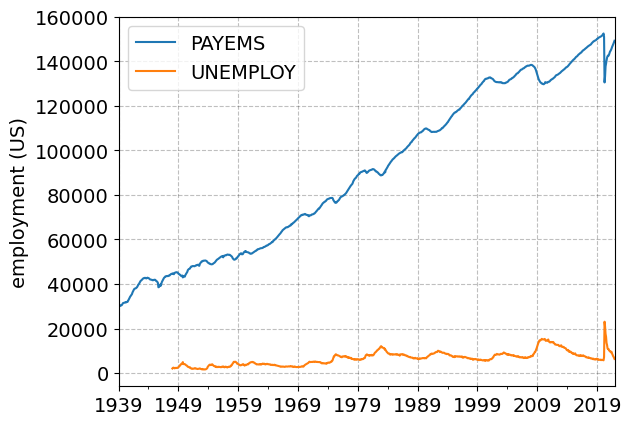

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Now we are just plotting directly from the pandas dataframe. Still using matplotlib under the hood.
empl_us.plot(ax=ax)

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('employment (US)');

### 1.3. <a id='toc1_3_'></a>[World Bank indicators: `wb`](#toc0_)

**Finding data:**

1. go to https://data.worldbank.org/indicator/
2. search for GDP 
3. variable name ("NY.GDP.PCAP.KD") is in the URL

**Pull GDP numbers:**

In [16]:
# Need a different module than in the FRED case
from pandas_datareader import wb

In [17]:
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['SE','DK','NO'], start=1990, end=2017)

wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD':'GDP'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)

,country,year,GDP
28,Norway,2017,75610.649483
65,Sweden,2008,48544.115894
60,Sweden,2013,49048.818750
11,Denmark,2006,53687.441547
8,Denmark,2009,50457.232489


In [18]:
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     object 
 1   year     84 non-null     object 
 2   GDP      84 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


**Problems:** 
* It turns out that the dataframe has stored the variable *year* as an "object", meaning in practice that it is a string. This must be converted to an int, as we want to use it as a number. 
* *country* is in fact a text variable, so it is acceptable to have it as an object type. But pandas has implemented a string type on its own. It is called 'string', while the text type of object that you normally encounter is of type 'str'. Yes, confusing!!  But you want to get it right, because an object variable can also contain numbers in addition to text. Which is bad. 
* Fortunately, GDP is a float (i.e. a number). 

In [19]:
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     string 
 1   year     84 non-null     int32  
 2   GDP      84 non-null     float64
dtypes: float64(1), int32(1), string(1)
memory usage: 1.8 KB


**Fetch employment-to-population ratio:**

In [20]:
wb_empl = wb.download(indicator='SL.EMP.TOTL.SP.ZS', country=['SE','DK','NO'], start=1990, end=2017) # don't need the special datetime here.
wb_empl.rename(columns = {'SL.EMP.TOTL.SP.ZS':'employment_to_pop'}, inplace=True) # Better col name
wb_empl.reset_index(inplace = True)
wb_empl.year = wb_empl.year.astype(int)
wb_empl.sample(3)

,country,year,employment_to_pop
45,Norway,2000,64.613998
10,Denmark,2007,63.213001
30,Norway,2015,62.186001


**Merge:**

In [21]:
wb = pd.merge(wb_gdp, wb_empl, how = 'outer', on = ['country','year']);
wb.head(5)

,country,year,GDP,employment_to_pop
0,Denmark,2017,55735.764901,58.122002
1,Denmark,2016,54556.068955,57.957001
2,Denmark,2015,53254.856370,57.469002
3,Denmark,2014,52404.763971,57.014999
4,Denmark,2013,51831.797931,56.887001


## 2. <a id='toc2_'></a>[A few examples of open access APIs](#toc0_)

As already demonstrated, you can pull data from DST using their API. Just to give a few examples of where else you may find open access to data by API: 
* Check out the [documentation for pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). There is a bunch of economic data banks to access through that. 
* There is an API for [covid-19 data](https://pypi.org/project/covid19-data/) that draws on several sources. 
* The National Museum of Art (DK) gives access to their collection [by an API](https://www.smk.dk/article/smk-api/). 
* NASA has its own API. [Look here](https://api.nasa.gov/) for their documentation and [here](https://pypi.org/project/python-nasa-api/) for a Python wrapper. 

## 3. <a id='toc3_'></a>[Other sources](#toc0_)
* **A crazy large collection of APIs** found on [this Github repo](https://github.com/public-apis/public-apis). Stocks, government, map data, lol memes, anything..
* Datasets behind [FiveThirtyEight articles](https://github.com/fivethirtyeight/data)  (youknow.. [this site](https://fivethirtyeight.com/))